In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
from collections import deque
import numpy as np

torch.manual_seed(1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:


#rotate a list by given offset, (negative offset, right to left) 
def rotateList(items, offset):
    return np.roll(items,offset)

#return 2 lists, one with A to Z in ascii and another with numbers from 1 to 27
def getLists():
    return np.array([x for x in range(ord('A'), ord('Z') + 1)]), np.array(np.arange(1,27).tolist())

def getGaussian(mean, std, std1, offset):
    return random.normal(loc=mean, scale=std, size=(10000)), random.normal(loc = mean, scale = std1, size = (10000))+offset



In [ ]:
getGaussian(5, 5, 3.5, 10)

(array([9.03186026e+00, 1.16292000e-02, 1.69955021e+00, ...,
        1.43864982e+01, 7.38175708e+00, 5.40479528e+00]),
 array([17.95465173,  4.95454323, 11.02346934, ..., 15.76183272,
        19.57361257, 11.67641565]))

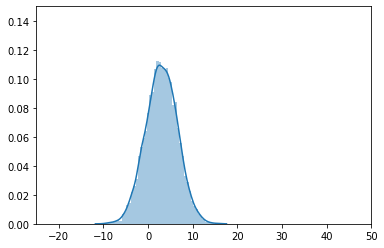

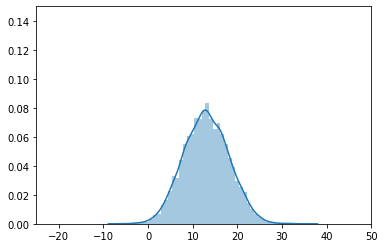

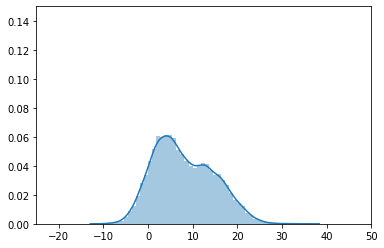

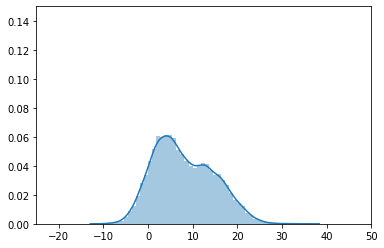

In [ ]:
set1 = random.normal(loc=3, scale=3.5, size=(10000))
plt.xlim(-25,50)
plt.ylim(0,.15)
sns.distplot(set1, hist=True)

plt.show()

set2 = random.normal(loc=3, scale=5, size=(10000))+10
plt.xlim(-25,50)
plt.ylim(0,.15)
sns.distplot(set2, hist=True)

plt.show()
plt.xlim(-25,50)
plt.ylim(0,.15)
sns.distplot(np.append(set1, set2), hist=True)

plt.show()
plt.xlim(-25,50)
plt.ylim(0,.15)
sns.distplot(np.vstack((set1, set2)), hist=True)

plt.show()

In [ ]:
def gaussiantimeseries(limit = 60, interval = 2):
    data = {}
    for t in range(0,limit,interval):
        data[t]=random.normal(loc = t, scale =.1, size =1000)
    return data

def createsignals(limit = 60, interval = 2):
    signal1,signal2 = [],[]
    offset = random.uniform(-5,5)
    data = gaussiantimeseries(limit, interval)
    for t in data:
        dist = data[t]
        signal1.append(random.choice(dist))
        signal2.append(random.choice(dist))
    return signal1,np.add(signal2,offset).tolist()
# print(createsignals())

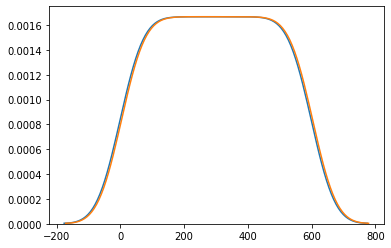

In [ ]:
sig1, sig2 = createsignals(limit = 600)

sns.distplot(sig1, hist=False)
sns.distplot(sig2, hist=False)
plt.show()



In [ ]:
signal = np.stack((sig1,sig2)).astype(float)
print(signal)

[[2.30483930e-02 2.04705731e+00 4.09462257e+00 6.05215016e+00
  8.16497820e+00 9.97301995e+00 1.19509969e+01 1.39129112e+01
  1.60664568e+01 1.78982394e+01 2.01232660e+01 2.19046343e+01
  2.41027377e+01 2.59635647e+01 2.81541539e+01 2.99178446e+01
  3.18292571e+01 3.39304522e+01 3.60693610e+01 3.80875257e+01
  4.01139440e+01 4.21019264e+01 4.39009241e+01 4.61850265e+01
  4.80807372e+01 4.97379258e+01 5.20621026e+01 5.39181457e+01
  5.59992967e+01 5.80731742e+01 5.99297629e+01 6.19813914e+01
  6.39560395e+01 6.59222538e+01 6.79304830e+01 7.02267150e+01
  7.21153549e+01 7.41429961e+01 7.60069000e+01 7.80018683e+01
  7.99695502e+01 8.19528412e+01 8.40072606e+01 8.60094300e+01
  8.80303676e+01 9.00478501e+01 9.20175752e+01 9.40477669e+01
  9.59032166e+01 9.80489503e+01 9.99442891e+01 1.01756540e+02
  1.03918973e+02 1.05961114e+02 1.07918007e+02 1.10180268e+02
  1.11963950e+02 1.14026438e+02 1.15951158e+02 1.18014483e+02
  1.20009731e+02 1.21956130e+02 1.24148215e+02 1.26118211e+02
  1.2807

In [ ]:
training_length = int(signal.shape[1]*(.8))
training_length

240

In [6]:
import numpy as np
np.random.uniform(1,100)

37.100429620434184

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(signal.reshape(-1, 1))

In [ ]:
print(signal.shape)
print(train_data_normalized.shape)
# print(train_data_normalized[-5:])

(2, 300)
(600, 1)


In [ ]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self, data, labels):
        self.labels = labels
        self.data = data

  def __len__(self):
        return len(self.data)

  def __getitem__(self, index):
        X = self.data[index]
        y = self.labels[index]

        return X, y

def prepareDataOld(num = 5):
    data = []
    labels = []

    # print(numbers)
    for i in range(num):
        alphabets = np.reshape(alphabets,(alphabets.size))
        numbersrotated = np.reshape(rotateList(numbers,i),(numbers.size))      
        data.append(torch.FloatTensor(np.append(alphabets, numbersrotated)))
        labels.append(torch.FloatTensor([i/10]))
        numbersrotatedopposite = np.reshape(rotateList(numbers,-i),(numbers.size))       
        data.append(torch.FloatTensor(np.append(alphabets, numbersrotatedopposite)))
        labels.append(torch.FloatTensor([-i/10]))
    training_length = int(len(data)*(.8))
    return CustomDataset(data[:training_length], labels[:training_length]), CustomDataset(data[training_length:], labels[training_length:])

def prepareData(num = 5):
    data = []
    labels = []
    for i in range(num):
        std1 = random.random()
        std2 = abs(random.uniform(std1+.5, std1-.5))
        offset = random.uniform(-10,10)
        set1, set2 = getGaussian(i,std1, std2, offset)
        data.append(torch.FloatTensor(np.vstack((np.reshape(set1,set1.size), np.reshape(set2, set2.size)))))
        labels.append(torch.FloatTensor([offset]))
    training_length = int(len(data)*(.8))
    return CustomDataset(data[:training_length], labels[:training_length]), CustomDataset(data[training_length:], labels[training_length:])

prepareData()

(<__main__.CustomDataset at 0x7f55e707c898>,
 <__main__.CustomDataset at 0x7f55e707c2b0>)

In [ ]:
a,b = getLists()
print(a)
print(b)
print(rotateList(b,1))

[65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
[26  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [ ]:
batch_size = 1
train_data, validation_data = prepareData(25)
train_loader = DataLoader(train_data,shuffle=True,batch_size=batch_size, num_workers=0, collate_fn=None,
           pin_memory=False)
val_loader = DataLoader(validation_data,shuffle=True,batch_size=batch_size, num_workers=0, collate_fn=None,
           pin_memory=False)

In [ ]:

class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim, batch_size=1, output_dim=1,
                    num_layers=2):
        super(Model, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
 
        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)
 
        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

 
    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))
 
    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)
 

In [ ]:
input_size = 20000
output_size = 1
embedding_dim = 200
hidden_dim = 512
n_layers = 2

model = Model(input_size,hidden_dim).to(device)


lr=0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
model

Model(
  (lstm): LSTM(52, 512, num_layers=2)
  (linear): Linear(in_features=512, out_features=1, bias=True)
)

In [ ]:
epochs = 50
print_every = 10


model.train()
 
hist = np.zeros(epochs)
 
for t in range(epochs):
    for inputs, labels in train_loader:
        # Clear stored gradient
        model.zero_grad()
        
        # Initialise hidden state
        # Don't do this if you want your LSTM to be stateful
        model.hidden = model.init_hidden()

        # print(inputs)
        inputs, labels = inputs.to(device), labels.to(device)
        # print(inputs.shape)
        # Forward pass
        y_pred = model(inputs).to(device)
        loss = criterion(y_pred, labels)
        if(t%print_every==0):
            # print(f"Label {labels}")
            # print(f"Prediction {y_pred}")
            print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()
    
        # Zero out gradient, else they will accumulate between epochs
        # optimizer.zero_grad()
    
        # Backward pass
        loss.backward()
    
        # Update parameters
        optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch  0 MSE:  5.940837860107422
Epoch  0 MSE:  100.18763732910156
Epoch  0 MSE:  52.157493591308594
Epoch  0 MSE:  73.7623519897461
Epoch  0 MSE:  30.228797912597656
Epoch  0 MSE:  2.2136855125427246
Epoch  0 MSE:  65.26642608642578
Epoch  0 MSE:  17.673423767089844
Epoch  0 MSE:  78.57814025878906
Epoch  0 MSE:  5.029909133911133
Epoch  0 MSE:  18.80129623413086
Epoch  0 MSE:  38.35064697265625
Epoch  0 MSE:  13.786447525024414
Epoch  0 MSE:  8.11246395111084
Epoch  0 MSE:  51.22892379760742
Epoch  0 MSE:  84.19489288330078
Epoch  0 MSE:  71.1078109741211
Epoch  0 MSE:  95.84803771972656
Epoch  0 MSE:  7.963618278503418
Epoch  0 MSE:  1.980350375175476
Epoch  10 MSE:  5.571739196777344
Epoch  10 MSE:  5.824152946472168
Epoch  10 MSE:  16.205961227416992
Epoch  10 MSE:  8.330552101135254
Epoch  10 MSE:  0.22711409628391266
Epoch  10 MSE:  19.778348922729492
Epoch  10 MSE:  5.800213813781738
Epoch  10 MSE:  0.03541959822177887
Epoch  10 MSE:  0.033220283687114716
Epoch  10 MSE:  25.210

**test**

In [ ]:
input_dim = 5
hidden_dim = 10
n_layers = 1

lstm_layer = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)

In [ ]:
batch_size = 1
seq_len = 1

inp = torch.randn(batch_size, seq_len, input_dim)
hidden_state = torch.randn(n_layers, batch_size, hidden_dim)
cell_state = torch.randn(n_layers, batch_size, hidden_dim)
hidden = (hidden_state, cell_state)

In [ ]:
out, hidden = lstm_layer(inp, hidden)
print("Output shape: ", out.shape)
print("Hidden: ", hidden)

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


training_data = [
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]
word_to_ix = {}
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)
tag_to_ix = {"DET": 0, "NN": 1, "V": 2}

# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

{'The': 0, 'dog': 1, 'ate': 2, 'the': 3, 'apple': 4, 'Everybody': 5, 'read': 6, 'that': 7, 'book': 8}


In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [ ]:
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# See what the scores are before training
# Note that element i,j of the output is the score for tag j for word i.
# Here we don't need to train, so the code is wrapped in torch.no_grad()
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)
    print(tag_scores)

for epoch in range(300):  # again, normally you would NOT do 300 epochs, it is toy data
    for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        print(sentence_in.shape)
        targets = prepare_sequence(tags, tag_to_ix)

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)

        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

# See what the scores are after training
with torch.no_grad():
    inputs = prepare_sequence(training_data[0][0], word_to_ix)
    tag_scores = model(inputs)

    # The sentence is "the dog ate the apple".  i,j corresponds to score for tag j
    # for word i. The predicted tag is the maximum scoring tag.
    # Here, we can see the predicted sequence below is 0 1 2 0 1
    # since 0 is index of the maximum value of row 1,
    # 1 is the index of maximum value of row 2, etc.
    # Which is DET NOUN VERB DET NOUN, the correct sequence!
    print(tag_scores)

tensor([[-0.8214, -1.4441, -1.1264],
        [-0.8110, -1.4408, -1.1430],
        [-0.7254, -1.5179, -1.2150],
        [-0.7427, -1.5127, -1.1911],
        [-0.8500, -1.4378, -1.0932]])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5])
torch.Size([4])
torch.Size([5]